In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data
df = pd.read_csv('kidney stone analysis.csv')
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0


In [3]:
# Checking Null values
df.isnull().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [4]:
# Checking the shape of the data
print('Shape :', df.shape)
print('Rows :', df.shape[0])
print('Columns :', df.shape[1])

Shape : (79, 7)
Rows : 79
Columns : 7


In [5]:
# Getting the statistical properties
df.describe()

,gravity,ph,osmo,cond,urea,calc,target
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.018114,6.028481,612.848101,20.813924,266.405063,4.138987,0.430380
std,0.007239,0.724307,237.514755,7.938994,131.254550,3.260051,0.498293
min,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,1.012000,5.530000,413.000000,14.150000,160.000000,1.460000,0.000000
50%,1.018000,5.940000,594.000000,21.400000,260.000000,3.160000,0.000000
75%,1.023500,6.385000,792.000000,26.550000,372.000000,5.930000,1.000000
max,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


<AxesSubplot:xlabel='gravity', ylabel='Density'>

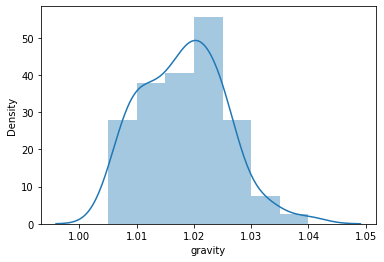

In [6]:
# Identifying outliers in 'gravity'
sns.distplot(df['gravity'], kde = True)

In [7]:
# There are no significant outliers in 'gravity' column.

<AxesSubplot:xlabel='ph', ylabel='Density'>

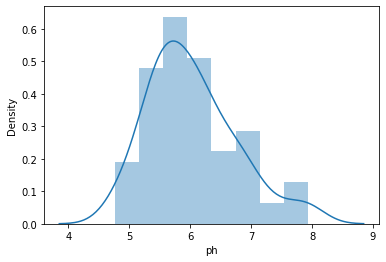

In [8]:
# Identifying outliers in 'gravity'
sns.distplot(df['ph'], kde = True)

In [9]:
# There are no significant outliers in 'ph' column.

In [10]:
# Checking composition of the data
df['target'].value_counts()

0    45
1    34
Name: target, dtype: int64

In [11]:
45/(79)

0.569620253164557

In [12]:
# Question 1 : 
# Identify outliers in all the input features and if there are any outliers, remove them.

In [13]:
# Performing Min Max Scaling
# Importing required library
from sklearn.preprocessing import MinMaxScaler

# Initializing the model
model = MinMaxScaler()
df.iloc[:, :6] = model.fit_transform(df.iloc[:, :6])
df.head()

,gravity,ph,osmo,cond,urea,calc,target
0,0.457143,0.047170,0.512869,0.270517,0.709836,0.160903,0
1,0.342857,0.308176,0.371783,0.452888,0.468852,0.304869,0
2,0.085714,0.767296,0.127741,0.297872,0.149180,0.154552,0
3,0.171429,0.235849,0.210677,0.227964,0.350820,0.139732,0
4,0.000000,0.553459,0.000000,0.072948,0.132787,0.069866,0


<AxesSubplot:xlabel='calc', ylabel='Density'>

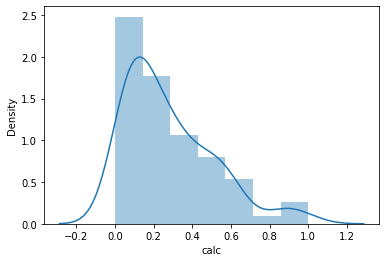

In [14]:
# Identifying outliers in 'gravity'
sns.distplot(df['calc'], kde = True)

In [15]:
# 'calc' is positively skewed with some outliers after 0.7

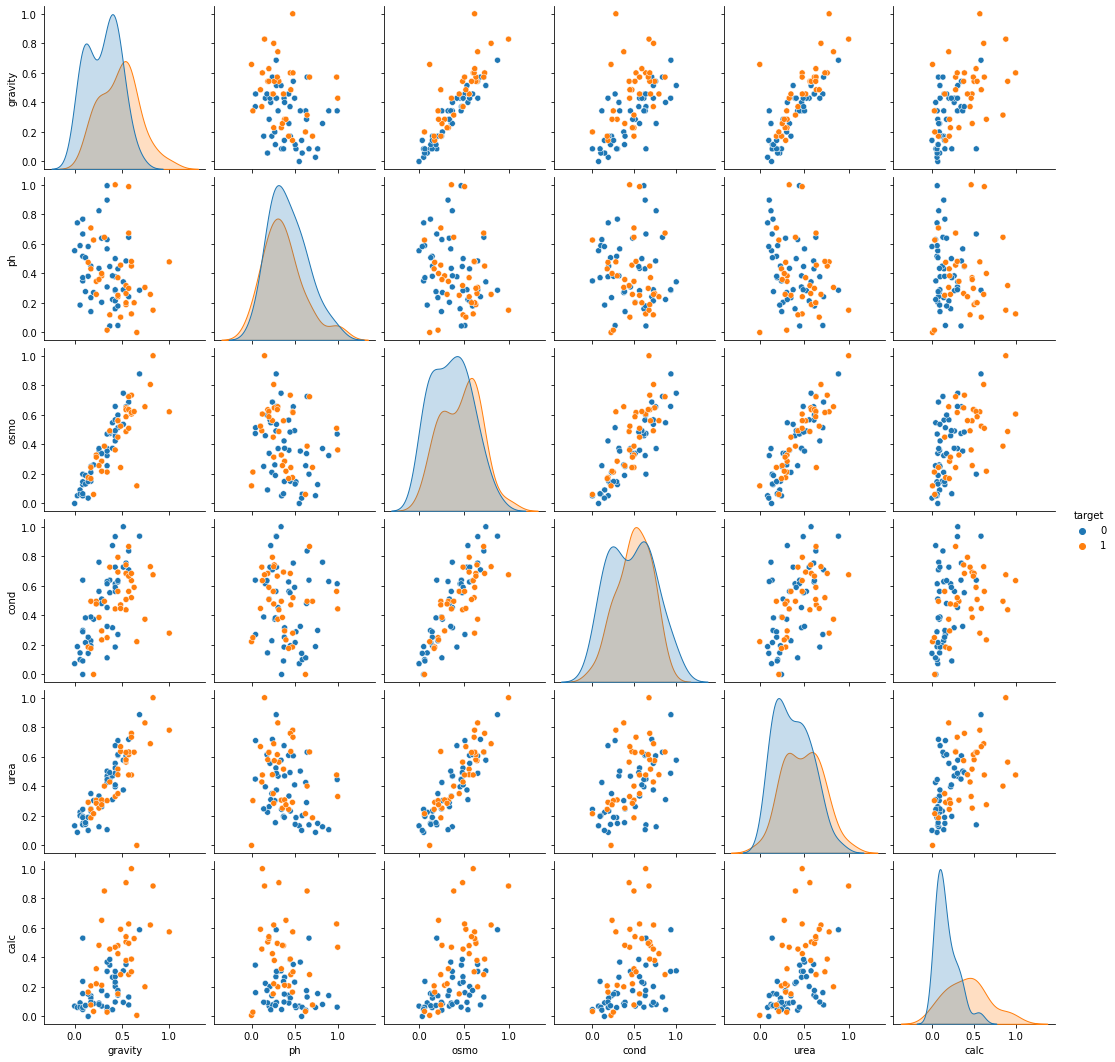

In [16]:
# pairplot
# Importing required library
import seaborn as sns
sns.pairplot(df, hue = 'target')

In [17]:
# People with kidney stone are having higher calcium concentration.
# There is a strong positive correlation between osmo and cond.
# There is a strong positive correlation between urea and calc.
# There is a strong positive correlation between osmo and urea.

In [18]:
# Seperating Input and Output Variables
X = df.iloc[:, :6]
y = df['target']

In [19]:
# Performing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 7)

In [20]:
# Getting optimal value of k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []
for i in range(3, 15, 2):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    train_acc = (accuracy_score(model.predict(X_train), y_train))
    test_acc = (accuracy_score(model.predict(X_test), y_test))
    acc.append([train_acc, test_acc])

print('Accuracy :\n', acc)

Accuracy :
 [[0.8591549295774648, 1.0], [0.7746478873239436, 1.0], [0.7887323943661971, 1.0], [0.7605633802816901, 1.0], [0.7605633802816901, 0.875], [0.7323943661971831, 0.875]]


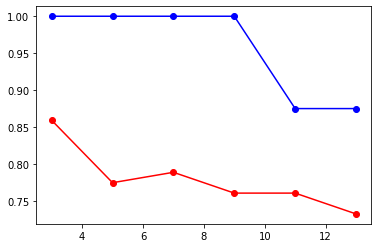

In [21]:
# Plot for optimal value of K
plt.plot(np.arange(3, 15, 2), [i[0] for i in acc], 'ro-')
plt.plot(np.arange(3, 15, 2), [i[1] for i in acc], 'bo-')
plt.show()

In [22]:
# Optimal Value of k is 3.

In [23]:
# Create an Optimal kNN model
model = KNeighborsClassifier(n_neighbors = 3)

# Fitting the model
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [24]:
# Predicting from the model
y_pred = model.predict(X_test)

In [25]:
# Getting the accuracy
print('Accuracy :', accuracy_score(y_test, y_pred))

Accuracy : 1.0


In [26]:
# Question 2 :
# Try to get cross validated accuracy for k=3.

In [27]:
# Bagging Classifier

In [28]:
# Creating the Model
# Initialization
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator = model,
                         n_estimators = 100,
                         bootstrap = True,
                         n_jobs = -1,
                         random_state = 7)

# Fitting the model
model.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),
                  n_estimators=100, n_jobs=-1, random_state=7)

In [29]:
# Predicting from the model
y_pred = model.predict(X_test)

In [30]:
# Getting the accuracy
print('Accuracy :', accuracy_score(y_test, y_pred))

Accuracy : 0.875


In [31]:
# Question 3 :
# Try Decision Tree Classifier model on the data and comment about the results.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
clf.fit(X_train, y_train)

# Predict for 1 observation
clf.predict(X_test.iloc[0].values.reshape(1, -1))
# Predict for multiple observations
clf.predict(X_test[0:10])

array([1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [32]:
score = clf.score(X_test, y_test)
print(score * 100)

87.5


In [33]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 7))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)
print(accuracy)

[1.0, 0.875, 0.75, 0.75, 0.625, 0.75]
